In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
#Import dataframe
df = pd.read_csv (r'C:\Python3\Scripts\kc_house_data.csv', delimiter = ',')

# Preprocessing

In [3]:
# find missing information
print('Is there missing data in the data frame:', df.isnull().values.any())

print('The columns that have missing data are:', df.columns[df.isnull().any()])        

#count number of missing values
print('The number of missing data is:', df.isnull().sum().sum())

Is there missing data in the data frame: False
The columns that have missing data are: Index([], dtype='object')
The number of missing data is: 0


In [ ]:
#Information about the database
#df.shape
#df.info()
#df.head(5)

In [ ]:
#Inputs we can remove from the data set and explanation:
#ID: non relevant as it is proper to each row
#Latitude and longitude: we can replace them by the zip code as geographical data
#sqft_living15 and sqft_lot15: can't understand them

In [ ]:
#dropping irrelevant data

In [4]:
df.drop(['id'], axis= 1, inplace=True)

In [5]:
df.drop(['lat'], axis= 1, inplace=True)

In [6]:
df.drop(['long'], axis= 1, inplace=True)

In [7]:
df.drop(['sqft_living15'], axis= 1, inplace=True)

In [8]:
df.drop(['sqft_lot15'], axis= 1, inplace=True)

In [ ]:
#Information about the database
#df.shape
#df.info()
#df.head(5)

In [9]:
#Extraction of the year:
df['Year'] = df['date'].str[:4]

In [10]:
df.drop(['date'], axis= 1, inplace=True)

In [12]:
#Information about the database
df.shape
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  Year           21613 non-null  object 
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,2015


# Data Visualization

c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


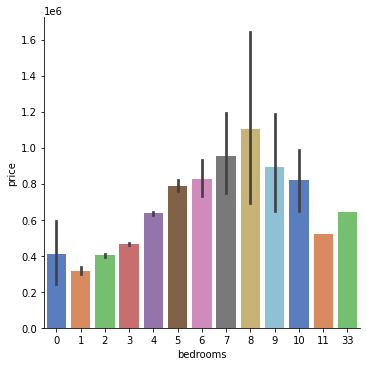

In [11]:
# Set up a factorplot to visualize correlation between Bedrooms and Price 
g = sns.factorplot("bedrooms", "price", data=df, kind="bar", palette="muted", legend=False)
g

c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


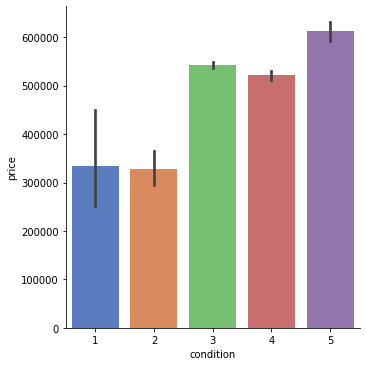

In [15]:
# Set up a factorplot to visualize correlation between Bedrooms and Price 
i = sns.factorplot("condition", "price", data=df, kind="bar", palette="muted", legend=False)
i

c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


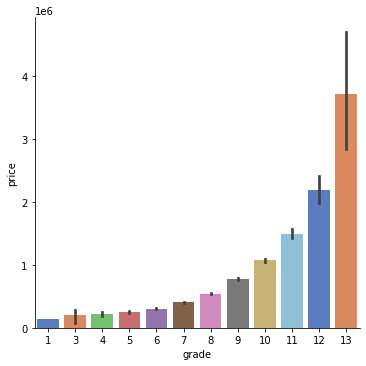

In [17]:
# Set up a factorplot to visualize correlation between Bedrooms and Price 
h = sns.factorplot("grade", "price", data=df, kind="bar", palette="muted", legend=False)
h

# Linear regression

In [ ]:
#slpitting data into learning and testing sets

In [45]:
#Information about the database
#df.shape
#df.info()
#df.head(5)

In [22]:
#Defining the input and output to the model:

x= df[["grade"]]
y= df["price"].values

#splitting data:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)  


In [23]:
#training the model using linear regression
lg1=LinearRegression()

lg1.fit(x_train, y_train)

#predicting:
predicted1 = lg1.predict(x_test)

In [25]:
#Indicators :
print("MSE: ", metrics.mean_squared_error(y_test, predicted1))
print("R squared: ", metrics.r2_score(y_test,predicted1))

MSE:  68743873233.93643
R squared:  0.4594226329030995


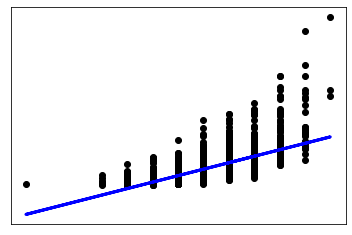

In [27]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, predicted1, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Polynomial Regression

In [34]:
#Information about the database
df.shape
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  Year           21613 non-null  object 
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,2015


In [43]:
#applying polynomial regression:
#Defining the input and output to the model:

v= df[["sqft_lot", "bedrooms", "sqft_living", "condition", "yr_built", "zipcode", "grade", "bathrooms", "yr_renovated", "zipcode", "Year"]]
z= df["price"].values

lg2=LinearRegression()
poly1=PolynomialFeatures(degree=3)


#splitting data:

v_train, v_test, z_train, z_test = train_test_split(v, z, test_size=0.25, random_state=40) 


v_train_fit = poly1.fit_transform(v_train) #transforming our input data
lg2.fit(v_train_fit, z_train)
v_test_ = poly1.fit_transform(v_test) #transforming our output data
predicted2 = lg2.predict(v_test_)


In [44]:
#Indicators :
print("MSE: ", metrics.mean_squared_error(y_test, predicted2))
print("R squared: ", metrics.r2_score(y_test,predicted2))

MSE:  39439094012.80668
R squared:  0.6898649930652251
